

```
# **This Section is mainly for the Citation as this is not my own dataset :3**
```



In [ ]:
@dataset{yamen_ajjour_2020_4139439,
  author       = {Yamen Ajjour and
                  Henning Wachsmuth and
                  Johannes Kiesel and
                  Martin Potthast and
                  Matthias Hagen and
                  Benno Stein},
  title        = {args.me corpus},
  month        = oct,
  year         = 2020,
  publisher    = {Zenodo},
  version      = {1.0-cleaned},
  doi          = {10.5281/zenodo.4139439},
  url          = {https://doi.org/10.5281/zenodo.4139439}
}

In [3]:
# Install Hugging Face's datasets library if not already installed
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [4]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset


In [5]:
import os
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"


In [6]:
# Load the Args.me Debate dataset from Hugging Face
dataset = load_dataset("webis/args_me", "corpus", split="train", trust_remote_code=True)
# Convert to a pandas DataFrame for easier manipulation
df = pd.DataFrame(dataset)
df.head()


README.md:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

args_me.py:   0%|          | 0.00/3.85k [00:00<?, ?B/s]

args-me.jsonl:   0%|          | 0.00/886M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

,argument,conclusion,stance,id
0,My opponent forfeited every round. None of my ...,Contraceptive Forms for High School Students,CON,c67482ba-2019-04-18T13:32:05Z-00000-000
1,How do you propose the school will fund your p...,Contraceptive Forms for High School Students,CON,c67482ba-2019-04-18T13:32:05Z-00001-000
2,Schools have no compelling interest in providi...,Contraceptive Forms for High School Students,CON,c67482ba-2019-04-18T13:32:05Z-00002-000
3,As a senior at my school. My group and I are f...,Contraceptive Forms for High School Students,PRO,c67482ba-2019-04-18T13:32:05Z-00003-000
4,The resolution used by Pro *assumes* that Aust...,Australia should be a more significant country,CON,4d3d4471-2019-04-18T11:45:01Z-00000-000


In [7]:
# Display the column names and data types
print("Dataset Columns:", df.columns)
print("Data Types:\n", df.dtypes)
print("\nSample Data:\n", df.sample(5))


Dataset Columns: Index(['argument', 'conclusion', 'stance', 'id'], dtype='object')
Data Types:
 argument      object
conclusion    object
stance        object
id            object
dtype: object

Sample Data:
                                                  argument  \
264614  I was analyzing your first point of the third ...   
34684   I wont extend myself on the question of the go...   
378937  "Report Shows Cost to Label Genetically Engine...   
277689  If God was all loving, he would not send ANYON...   
235132  Sorry that I got forfeited. I just got a 3-day...   

                                               conclusion stance  \
264614                                          Marijuana    CON   
34684   Science is not against catholic religion: the ...    PRO   
378937  Cost of labeling GM foods are exaggerated by o...    PRO   
277689                               Hell does not exist.    PRO   
235132        Resolved, that castration must be legalized    PRO   

               

In [8]:
# Check for any missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 argument      0
conclusion    0
stance        0
id            0
dtype: int64


Argument Text Lengths:
 count    382545.000000
mean       1675.366579
std        2280.850067
min           1.000000
25%         158.000000
50%         678.000000
75%        2205.000000
max      105982.000000
Name: argument_length, dtype: float64
Conclusion Text Lengths:
 count    382545.000000
mean         43.968187
std          24.165220
min           1.000000
25%          25.000000
50%          40.000000
75%          59.000000
max        1160.000000
Name: conclusion_length, dtype: float64


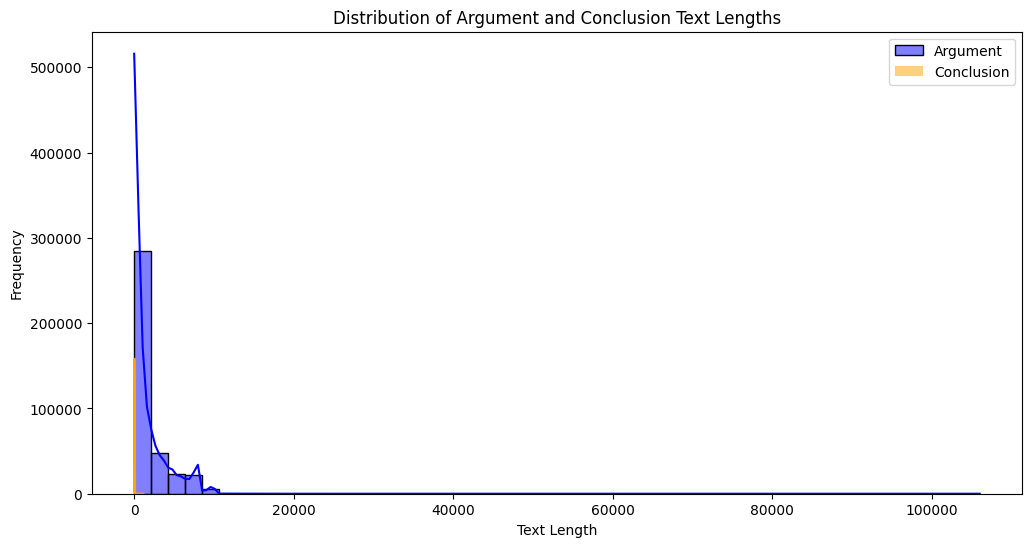

In [9]:
# Calculate and visualize text lengths for 'argument' and 'conclusion' columns
df['argument_length'] = df['argument'].apply(len)
df['conclusion_length'] = df['conclusion'].apply(len)

print("Argument Text Lengths:\n", df['argument_length'].describe())
print("Conclusion Text Lengths:\n", df['conclusion_length'].describe())

# Plot text length distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['argument_length'], bins=50, kde=True, color='blue', label="Argument")
sns.histplot(df['conclusion_length'], bins=50, kde=True, color='orange', label="Conclusion")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Argument and Conclusion Text Lengths")
plt.show()


Stance Distribution:
 stance
PRO    197780
CON    184765
Name: count, dtype: int64


<ipython-input-10-23caace4f2d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stance', data=df, palette='viridis')


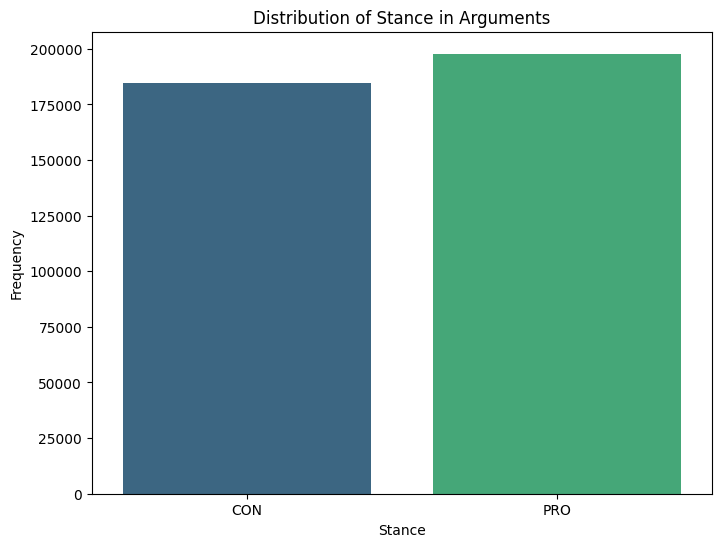

In [10]:
# Check unique values and count in 'stance' column
stance_counts = df['stance'].value_counts()
print("Stance Distribution:\n", stance_counts)

# Visualize stance distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='stance', data=df, palette='viridis')
plt.title("Distribution of Stance in Arguments")
plt.xlabel("Stance")
plt.ylabel("Frequency")
plt.show()


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Extract representative keywords for each topic
def get_top_keywords(n_terms):
    df['topic'] = kmeans.labels_  # Ensure the topic column is updated with cluster labels
    vectorizer = CountVectorizer(stop_words="english", max_features=1000)
    X = vectorizer.fit_transform(df["cleaned_argument"])

    terms = vectorizer.get_feature_names_out()
    topic_keywords = []

    for i in range(num_clusters):
        # Sum the occurrences of words in each cluster and convert to a dense array
        topic_terms = np.array(X[df["topic"] == i].sum(axis=0)).flatten()
        term_ranking = np.argsort(topic_terms)[::-1]  # Get indices of terms with highest frequency
        top_terms = [terms[t] for t in term_ranking[:n_terms]]
        topic_keywords.append(" ".join(top_terms))

    return topic_keywords

# Get top keywords for each topic
top_keywords = get_top_keywords(n_terms=5)
for i, keywords in enumerate(top_keywords):
    print(f"Topic {i}: {keywords}")


Topic 0: school students schools education student
Topic 1: god jesus bible argument universe
Topic 2: marriage gay people sex children
Topic 3: debate opponent round arguments argument
Topic 4: people like opponent argument time
Topic 5: extend arguments opponent round argument
Topic 6: http www com org people
Topic 7: pro argument debate round people
Topic 8: people like time good uu
Topic 9: accept challenge debate good luck


<ipython-input-17-4f4d772d1ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=topic_counts.values, y=topic_counts.index, palette="viridis")


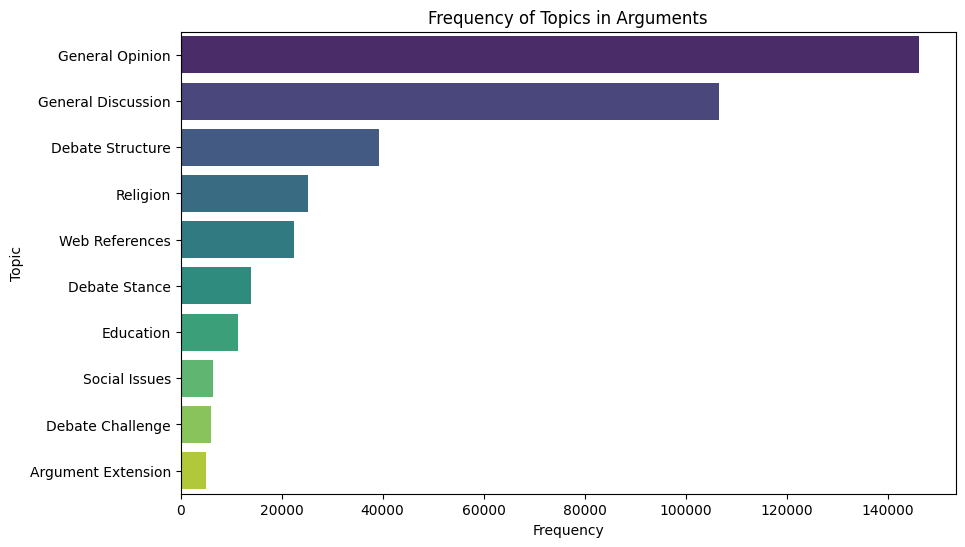

In [17]:
# Define topic labels based on interpretation of keywords
topic_labels = [
    "Education", "Religion", "Social Issues", "Debate Structure",
    "General Discussion", "Argument Extension", "Web References",
    "Debate Stance", "General Opinion", "Debate Challenge"
]

# Map topic numbers to labels
df["topic_label"] = df["topic"].map(lambda x: topic_labels[x])

# Visualize with labels
topic_counts = df["topic_label"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=topic_counts.values, y=topic_counts.index, palette="viridis")
plt.title("Frequency of Topics in Arguments")
plt.xlabel("Frequency")
plt.ylabel("Topic")
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the dataset
X = vectorizer.transform(df["cleaned_argument"])  # Use the TF-IDF features we generated earlier
y = df["topic"]  # Use the KMeans cluster labels as the target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=topic_labels))


Decision Tree Accuracy: 0.86

Classification Report:
                     precision    recall  f1-score   support

         Education       0.88      0.85      0.86      2262
          Religion       0.92      0.92      0.92      4947
     Social Issues       0.88      0.86      0.87      1304
  Debate Structure       0.86      0.86      0.86      7911
General Discussion       0.80      0.80      0.80     21403
Argument Extension       0.98      0.98      0.98       991
    Web References       0.85      0.85      0.85      4471
     Debate Stance       0.88      0.88      0.88      2801
   General Opinion       0.87      0.88      0.87     29298
  Debate Challenge       0.98      0.97      0.98      1121

          accuracy                           0.86     76509
         macro avg       0.89      0.88      0.89     76509
      weighted avg       0.86      0.86      0.86     76509



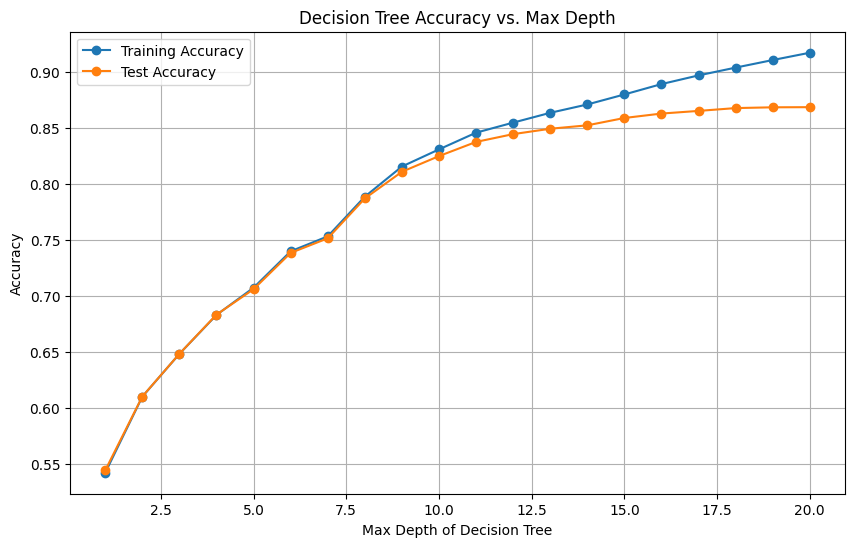

Optimal Max Depth: 20
Best Test Accuracy at Optimal Depth: 0.87


In [20]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Range of depths to evaluate
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depths:
    # Train a Decision Tree with the current depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Evaluate on the training and test set
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    # Store the accuracy for each depth
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot depth vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(depths, test_accuracies, label="Test Accuracy", marker='o')
plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs. Max Depth")
plt.legend()
plt.grid(True)
plt.show()

# Find the best depth based on test accuracy
best_depth = depths[test_accuracies.index(max(test_accuracies))]
print(f"Optimal Max Depth: {best_depth}")
print(f"Best Test Accuracy at Optimal Depth: {max(test_accuracies):.2f}")


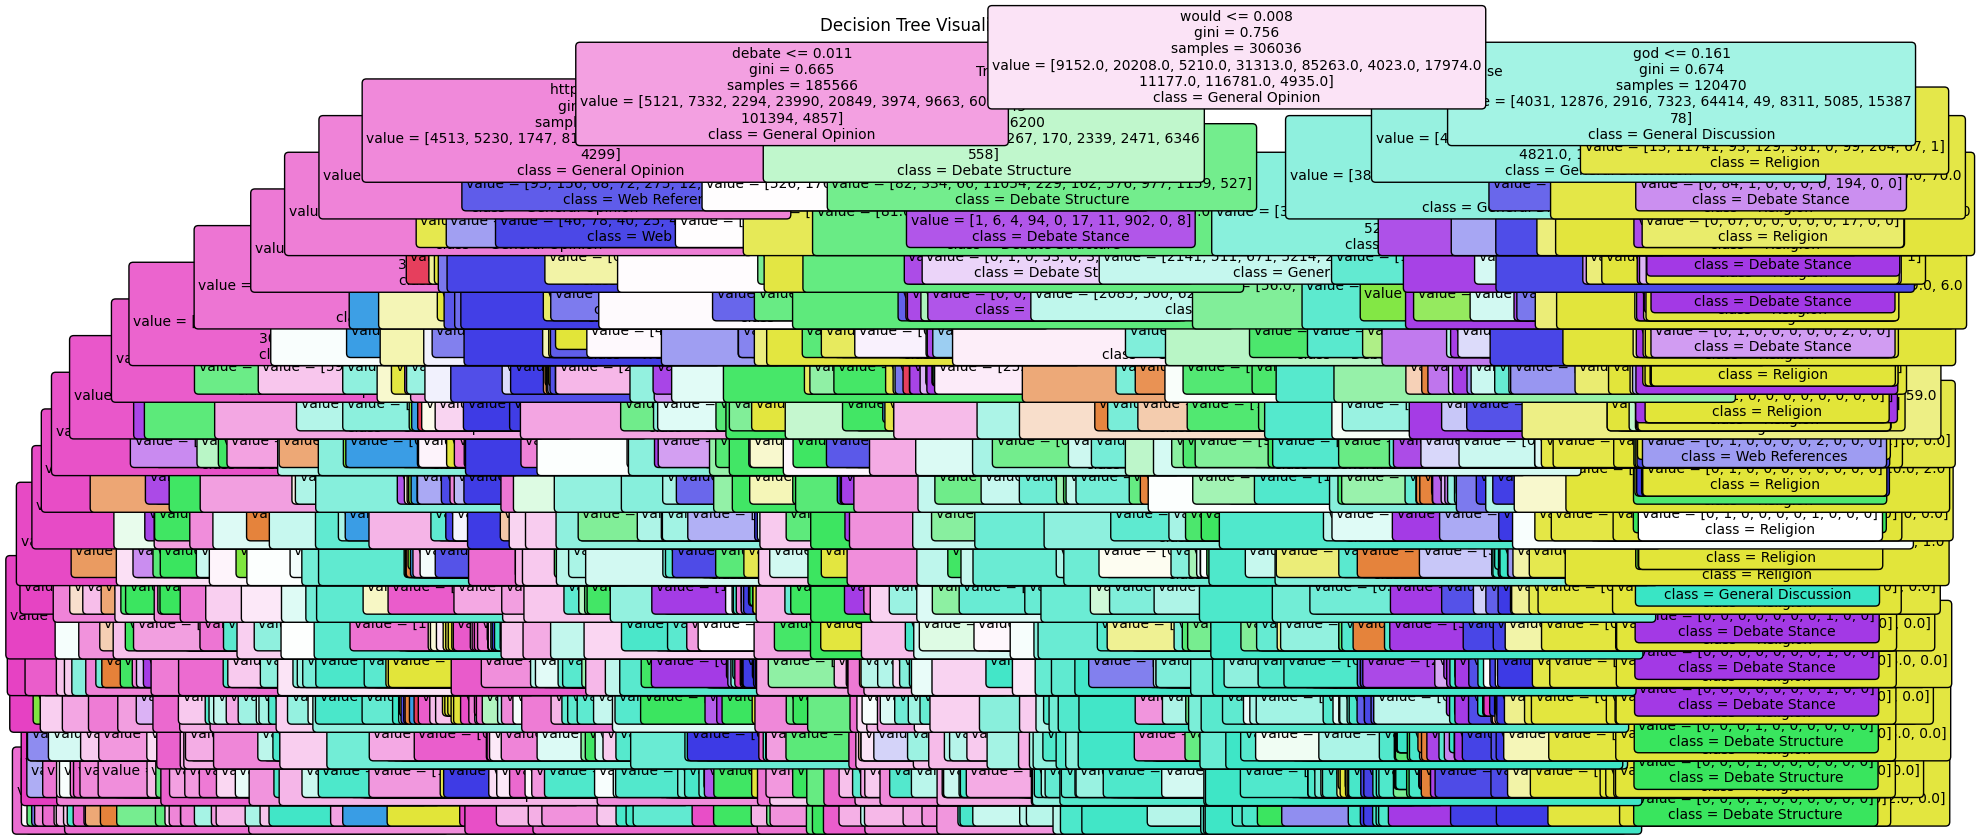

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Limit depth for visualization (optional, set max_depth to a smaller value if the tree is too large)
clf_limited = DecisionTreeClassifier(max_depth=20, random_state=42)
clf_limited.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf_limited,
    feature_names=vectorizer.get_feature_names_out(),
    class_names=topic_labels,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()
